# **STAT 331 PROJECT - SANTIAGO HOYOS**

**Introduction**

The determination of musical genres can be key for the implementation of new algorithms and studies in the field of music. Julio Arce, director of the Department of Musicology at the Complutense University of Madrid, explains to Verne that defining musical genre is "something very controversial in musicology", because it depends on different factors that also change over time. Therefore, in this project an analysis was carried out on the factors that can be associated with music. This can be variables such as the duration of the song, name, tempo, musical keys or danceability can contribute to the prediction of the different musical genres.

This type of study can be key to streaming music playback applications. An example of this could be the Spotify application, where one of its classification methods is carried out by artificial intelligence that takes into account song attributes such as danceability, happiness, relaxation, among others. Based on the above, carrying out a correct classification of the genres is of the utmost importance since users should be able to find and discover songs of their complete liking.

For this statistical analysis, a database will be taken into account:
  
    Prediction of music genre.
    
This database was obtained from Kaggle, taking into account that it had to be viable for multivariate analysis.


It is important to clarify that we will see reflected a general approach and development of the problem under the guidelines given by and for the Statistical Data Analysis course.
    
The tool that will be used for this data analysis will be R. A language designed for the analytical study of data, with which histograms, population graphs and tables will be made that will help the general description of the problem in question.

In [37]:
import pandas as pd
df = pd.read_csv("music_genre.csv")

# Objectives

- Analyze the variables to know those that indicate a true correlation that helps to predict the genre of the song.

- Make use of the different topics seen in class such as Linear Regression and Data Visualization.

- Predict the variable that indicates the popularity of the songs, using linear regression, in order to find the most popular genre.


# Data
The database has the following attributes:

    1. Instance id: Unique identification for each music.
    2. artist name: Name of the artist.
    3. track name: Name of the song.
    4. popularity: How popular is the music.
    5. acousticness: Ac ́ustica.
    6. danceability: Danceability.
    7. duration ms: The duration of the music in ms.
    8. energy: Energy.
    9. instrumentalness: Instrumentality.
    10. key: Music key.
    11. Liveness
    12. loudness
    13. mode
    14. speechiness
    15. tempo
    16. obtaine date
    17. valence
    18. music genre

In [38]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


We can check if there's missing data:

In [39]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        missing.append(df[item].isna().sum())

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'missing': missing, 
    })    
        
    return output

show_missing(df)


,variable,dtype,count,missing
0,instance_id,float64,50005,5
1,artist_name,object,50005,5
2,track_name,object,50005,5
3,popularity,float64,50005,5
4,acousticness,float64,50005,5
5,danceability,float64,50005,5
6,duration_ms,float64,50005,5
7,energy,float64,50005,5
8,instrumentalness,float64,50005,5
9,key,object,50005,5


# Data Visualization

First a quick summary:

In [40]:
df_complete = df.dropna(axis = 0, how = 'any')
df_complete.describe(include='number')

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


Individual variables:

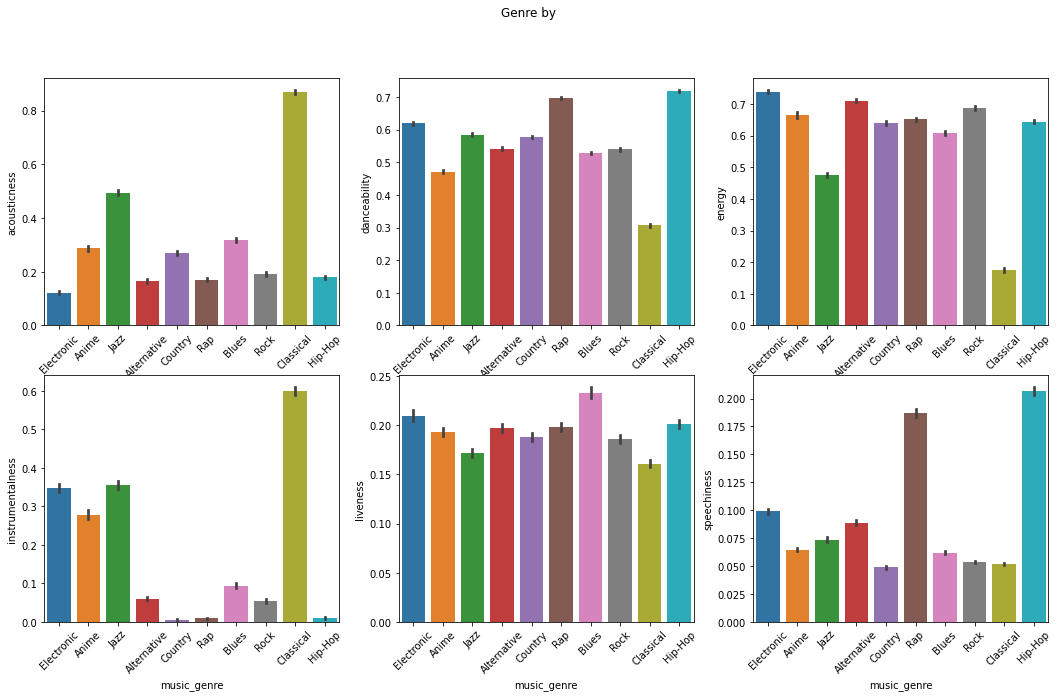

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


#plt.figure(figsize=(12,7))
#sns.barplot(data = df_complete, y="valence", x="music_genre", palette='rainbow')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Genre by ')

g = sns.barplot(ax=axes[0, 0], data=df_complete, x='music_genre', y='acousticness')
g1 = sns.barplot(ax=axes[0, 1], data=df_complete, x='music_genre', y='danceability')
g2 = sns.barplot(ax=axes[0, 2], data=df_complete, x='music_genre', y='energy')
g3 = sns.barplot(ax=axes[1, 0], data=df_complete, x='music_genre', y='instrumentalness')
g4 = sns.barplot(ax=axes[1, 1], data=df_complete, x='music_genre', y='liveness')
g5 = sns.barplot(ax=axes[1, 2], data=df_complete, x='music_genre', y='speechiness')

g.set_xticklabels(g.get_xticklabels(), rotation=45)
g1.set_xticklabels(g.get_xticklabels(), rotation=45)
g2.set_xticklabels(g.get_xticklabels(), rotation=45)
g3.set_xticklabels(g.get_xticklabels(), rotation=45)
g4.set_xticklabels(g.get_xticklabels(), rotation=45)
g5.set_xticklabels(g.get_xticklabels(), rotation=45)

None


It is possible to see that there are variables who represent or that have a preference for certain genre.

We can also check the popularity:

<Axes: xlabel='popularity', ylabel='music_genre'>

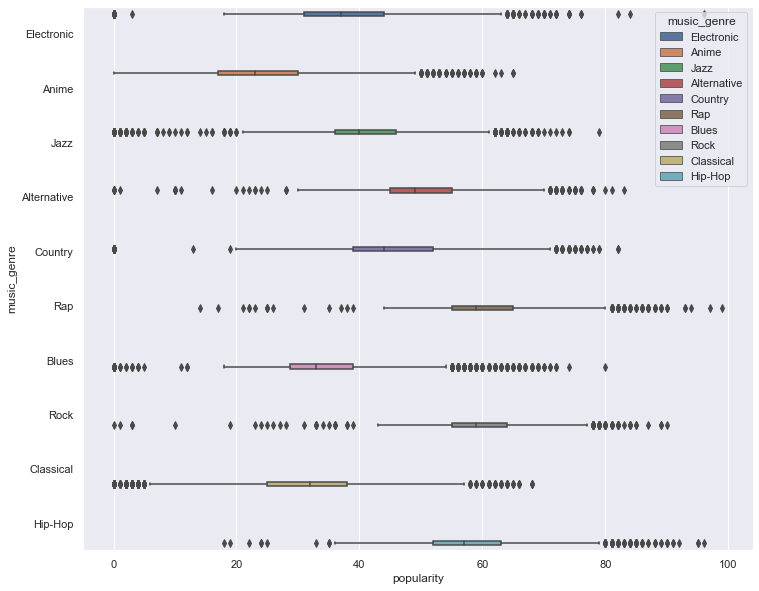

In [42]:
popularity = df_complete['popularity']
genres = df_complete['music_genre']

# fig = plt.figure(figsize = (10, 5))
# plt.bar(genres, popularity)

# # Set the axis labels
# plt.xlabel('popularity')
# plt.ylabel('genres')

# # # Show the plot
# plt.show()
# plt.hist(df_complete['popularity'])
# Figure Size

sns.set(rc={"figure.figsize":(12, 10)})
sns.boxplot(x = df_complete['popularity'],
            y = df_complete['music_genre'],
            hue = df_complete['music_genre'])



Thus, it is evident that the most listened genres in the last months present levels of popularity higher than Classical or Anime tracks, even if these two genres have been more popular over time.

With all the information above, it is noticeable that the dataset can be used for different Data Quality topics such as: missing data imputation, Standardization and parsing, Data preparation for data mining. For this reason, in this project I will be trying to use different methods to study or apply those topics.

# PCA

Principal component analysis is a technique used to describe a set of data.
in terms of new uncorrelated variables (≪components≫). The components are arranged
nan by the amount of original variance they describe, so the technique is useful for reducing the
dimensionality of a data set.
Technically, the PCA looks for the projection according to which the data is best represented
in terms of least squares. This converts a set of observations to variables
possibly correlated into a set of linearly uncorrelated variable values ​​called
main components

In [43]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("music_genre.csv")

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Fill missing values with mean
df_filled = df_numeric.fillna(df_numeric.mean())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Perform PCA
pca = PCA(n_components=10)
principal_components = pca.fit_transform(df_scaled)

# Print information for each principal component
for i in range(pca.n_components_):
    print(f"Principal Component {i+1}:")
    print(f"Standard deviation: {np.sqrt(pca.explained_variance_[i]):.2f}")
    print(f"Proportion of variance: {pca.explained_variance_ratio_[i]:.2f}")
    print(f"Cumulative proportion: {np.sum(pca.explained_variance_ratio_[:i+1]):.2f}\n")

Principal Component 1:
Standard deviation: 1.91
Proportion of variance: 0.33
Cumulative proportion: 0.33

Principal Component 2:
Standard deviation: 1.13
Proportion of variance: 0.12
Cumulative proportion: 0.45

Principal Component 3:
Standard deviation: 1.03
Proportion of variance: 0.10
Cumulative proportion: 0.54

Principal Component 4:
Standard deviation: 1.00
Proportion of variance: 0.09
Cumulative proportion: 0.63

Principal Component 5:
Standard deviation: 0.99
Proportion of variance: 0.09
Cumulative proportion: 0.72

Principal Component 6:
Standard deviation: 0.93
Proportion of variance: 0.08
Cumulative proportion: 0.80

Principal Component 7:
Standard deviation: 0.87
Proportion of variance: 0.07
Cumulative proportion: 0.87

Principal Component 8:
Standard deviation: 0.78
Proportion of variance: 0.05
Cumulative proportion: 0.92

Principal Component 9:
Standard deviation: 0.69
Proportion of variance: 0.04
Cumulative proportion: 0.97

Principal Component 10:
Standard deviation: 0.

# Clustering

Clustering it is the task of grouping objects by similarity into groups or sets in such a way that the members
of the same group have similar characteristics. It is the main task of data mining
exploratory and is a common technique in the analysis of statistical data.

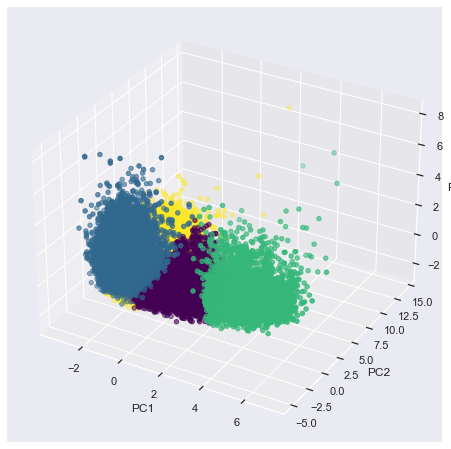

In [44]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("music_genre.csv")

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Fill missing values with mean
df_filled = df_numeric.fillna(df_numeric.mean())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(principal_components)

# Create scatter plots of the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


To make the respective graph of the 4 separations carried out by the clustering, it was taken into account the
components that were found in the PCA, where each PC1, PC2 and PC3 correspond to the first
3 components respectively. Now, it is clear that a good separation of the data is not seen since
that we see too many removed from the main groups and yet classified in them.

# Linear Regression

This method is applicable in many situations in which the relationship between two or more
variables or predict behavior, some even unrelated to technology. In case of
that a regression model cannot be applied to a study, it is said that there is no correlation between
the variables studied.
It was decided to do the regression to predict popularity

In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('music_genre.csv')
df = df.dropna()

# Select numerical columns
numerical_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

# Create X (independent variables) and y (dependent variable)
X = df[numerical_columns]
y = df['popularity']

# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1693.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:59:03   Log-Likelihood:            -2.0147e+05
No. Observations:               50000   AIC:                         4.030e+05
Df Residuals:                   49990   BIC:                         4.031e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               46.9999      0.590  

# Covariance matrix

In [46]:
import pandas as pd

# Load the dataset
df = pd.read_csv('music_genre.csv')

# Drop rows containing missing values
df = df.dropna()

# Select numerical columns
numerical_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

# Compute the covariance matrix
cov_matrix = df[numerical_columns].cov()

# Print the covariance matrix
print(cov_matrix)


                  acousticness  danceability   duration_ms       energy  \
acousticness          0.116513     -0.021200  2.717055e+03    -0.071454   
danceability         -0.021200      0.031909 -3.574315e+03     0.012473   
duration_ms        2717.055158  -3574.314832  1.655647e+10 -2253.631395   
energy               -0.071454      0.012473 -2.253631e+03     0.069992   
instrumentalness      0.043094     -0.017513  5.432277e+03    -0.033552   
liveness             -0.006026     -0.001486  4.141107e+02     0.007985   
loudness             -1.536527      0.430299 -8.128998e+04     1.366990   
speechiness          -0.005653      0.005066 -1.090944e+03     0.004242   
valence              -0.022795      0.019183 -4.151893e+03     0.025910   

                  instrumentalness    liveness      loudness  speechiness  \
acousticness              0.043094   -0.006026     -1.536527    -0.005653   
danceability             -0.017513   -0.001486      0.430299     0.005066   
duration_ms       

# Correlation Matrix

The correlation matrix was made in order to contribute to our analysis by reviewing the coe-
deficiencies of connection between the factors. Each component of the matrix shows us the connection
between the two factors

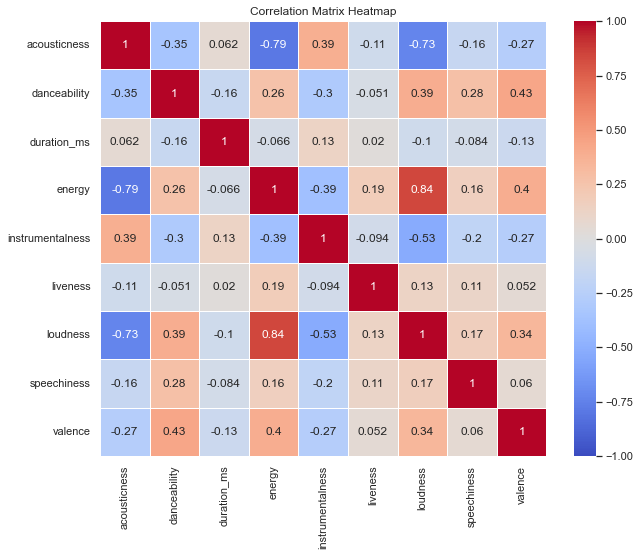

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('music_genre.csv')

# Drop rows containing missing values
df = df.dropna()

# Select numerical columns
numerical_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

# Set plot title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()



Energy and loudness are the ones that have a positive correlation. Energy is a measure of the intensity
dad. Features that contribute to the calculation of this value include dynamic range, volume
perceived, timbre, onset frequency, and general entropy. So certain characteristics that
affect the calculation of this variable, they are also part of the calculation of loudness, which is the volume
general menu of a song.

Acousticness and energy: They have a high negative correlation. If a song has a level of
high acousticness, it would be less likely to contain non-acoustic sounds and therefore the
timbre or dynamic range will be more limited. This would affect the energy levels, which would be
lower.

# Anova

In [48]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
df = pd.read_csv('music_genre.csv')

# Drop rows containing missing values
df = df.dropna()

# Fit the ANOVA model
model = ols('popularity ~ C(music_genre)', data=df).fit()

# Perform the one-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=1)

# Print the ANOVA table
print(anova_table)

# Perform the Tukey HSD test
tukey_results = pairwise_tukeyhsd(df['popularity'], df['music_genre'], alpha=0.05)

# Print the Tukey HSD test results
print(tukey_results)


                     df        sum_sq        mean_sq            F  PR(>F)
C(music_genre)      9.0  7.499805e+06  833311.694242  9100.130114     0.0
Residual        49990.0  4.577655e+06      91.571404          NaN     NaN
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1     group2   meandiff p-adj   lower    upper   reject
---------------------------------------------------------------
Alternative      Anime -25.9526    0.0 -26.5581 -25.3471   True
Alternative      Blues -15.4202    0.0 -16.0257 -14.8147   True
Alternative  Classical -20.9084    0.0 -21.5139 -20.3029   True
Alternative    Country  -4.2142    0.0  -4.8197  -3.6087   True
Alternative Electronic -12.1124    0.0 -12.7179 -11.5069   True
Alternative    Hip-Hop   8.1754    0.0   7.5699   8.7809   True
Alternative       Jazz  -9.2956    0.0  -9.9011  -8.6901   True
Alternative        Rap  10.2732    0.0   9.6677  10.8787   True
Alternative       Rock    9.417    0.0   8.8115  10.0225   True
      Anim

We observe in the results that there are statistically significant differences between the
musical genres (F(2, 49990)=9100 and p value is less than <0.05). Since ANOVA
only shows us that there is a significant difference between the means of at least two groups and
we reject the initial hypothesis, then we used the TukeyHDS test that showed which is the gender that
differs in their means.

We see that the genres furthest away in popularity are Hip-Hop-Anime with Hip-Hop averaging
34.12 more popularity than Anime, then Rap-Anime with Rap 36.22 more popular than Anime,
and Rock-Anime with Rock 35.36 more popular than Anime. Furthermore, we see that the smallest value
The difference is between Anime-Alternative, which lets us know that their popularity is very similar
and it is very low.

With these results we can see that the most popular genres in our study are Rock and Rap
since we also see that they differ by -0.85, which is not much and that Rock exceeds popularity
of Rap for very little

# Conclusions

    The dataset has a total of 50,005 rows and 18 columns. It contains information about artist name, track name, popularity, acousticness, danceability, duration, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, obtained date, valence, and music genre.

    The mean popularity of the tracks is 44.22, with a standard deviation of 15.54. The minimum popularity is 0, while the maximum is 99.

    The first five principal components account for approximately 72% of the total variance in the data.

    The multiple linear regression model has an adjusted R-squared of 0.233, indicating that the model can explain about 23.3% of the variation in popularity. The F-statistic is 1693, with a p-value close to 0.

    From the multiple linear regression, the most significant predictors of popularity are instrumentalness (-10.9355), danceability (18.8686), and speechiness (16.0870).

    The one-way ANOVA test shows that there are significant differences in the mean popularity of tracks across music genres (p-value = 0.0).

    The Tukey HSD test indicates that the mean popularity of each music genre pair is significantly different from each other.

At this point in the project and regarding the results obtained, we can conclude that in this
case, the most popular genres are Rock and Rap. 

Additionally, regarding our main objective of the project, that is, to classify the genre
regarding to the variables that characterize music genre, we were able to observe that popularity
is a very important variable along with acousticness and speechiness. Also instrumentalness
once the song has been ranked according to its popularity and acousticness.